## Airline Tweets: Sentiment Analysis & Simple Classification

### ISM6564

**Week04, Part02**

&copy; 2023 Dr. Tim Smith

<a target="_blank" href="https://colab.research.google.com/github/prof-tcsmith/ta-f23/blob/main/W04/4.3-Tutorial - Descriptive Analysis - brand sentiment.ipynb#offline=1">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---

## Introduction

In this notebook we will analysze the sentiment from a dataset on how travelers tweeted about their airline-related feelings, scraped from Twitter in February 2015;.

In [5]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/293.3 kB ? eta -:--:--
     ----- ------------------------------- 41.0/293.3 kB 487.6 kB/s eta 0:00:01
     ----------- ------------------------- 92.2/293.3 kB 871.5 kB/s eta 0:00:01
     ----------------------------- -------- 225.3/293.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 2.0 MB/s eta 0:00:00


In [6]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt

from nltk.tokenize import TweetTokenizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob
import seaborn as sns

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
# read in the data 
df = pd.read_csv('data/Tweets.csv') 
df.head()

,tweet_id,airline,name,retweet_count,text
0,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.
1,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...
2,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...
4,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...


In [10]:
tokenizer = TweetTokenizer()

def clear_text(text):
    # tokenize the text
    # nltk.download('punkt') # uncomment if you need to download the punkt package
    tokens = tokenizer.tokenize(text)
    
    # remove all tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # make lowercase
    tokens = [word.lower() for word in tokens]

    # remove all tokens that are only one character
    tokens = [word for word in tokens if len(word) > 1]

    return ' '.join(tokens)

df['clean_text']=df.text.apply(lambda x: clear_text(x))   
df['hashtags'] = df.text.apply(lambda text: re.findall(r"#(\w+)", text))
df['handles'] = df.text.apply(lambda text: re.findall(r"@(\w+)", text))

In [11]:
df.head(50)

,tweet_id,airline,name,retweet_count,text,clean_text,hashtags,handles
0,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,what said,[],"[VirginAmerica, dhepburn]"
1,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,plus added commercials to the experience tacky,[],[VirginAmerica]
2,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,today must mean need to take another trip,[],[VirginAmerica]
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,really aggressive to blast obnoxious entertain...,[],[VirginAmerica]
4,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,and really big bad thing about it,[],[VirginAmerica]
5,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight for seats that have...,[],[VirginAmerica]
6,5.703010e+17,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time fly vx this ear worm won...,[],[VirginAmerica]
7,5.703000e+17,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,really missed prime opportunity for men withou...,[],[VirginAmerica]
8,5.703000e+17,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",well but now do,[],[virginamerica]
9,5.702950e+17,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",it was amazing and arrived an hour early too g...,[],[VirginAmerica]


In [12]:
df = df.drop(columns=["tweet_id", "name", "retweet_count"]) # though we could use these columns for other analysis, for this analysis we will not

In [13]:
df["airline"].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

### Sentiment analysis using TextBlob

In [14]:
analyzer = SentimentIntensityAnalyzer()

df['tb_polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).polarity)
df['tb_sentiment'] = df['tb_polarity'].apply(lambda x: 'pos' if x >=0 else 'neg')

df.sample(n=20)

,airline,text,clean_text,hashtags,handles,tb_polarity,tb_sentiment
1109,United,"@united Hi, Im flying SFO-LAX-SAL-CLO. My conn...",hi im flying my connecting time in lax is is i...,[],[united],0.000000,pos
2213,United,@united still waiting,still waiting,[],[united],0.000000,pos
6626,Southwest,"@SouthwestAir also, they said they couldn't ev...",also they said they even book the flight they ...,[],[SouthwestAir],0.000000,pos
5439,Southwest,@SouthwestAir Do you have childrens rates for ...,do you have childrens rates for flights,[],[SouthwestAir],0.000000,pos
6838,Delta,“@JetBlue: @jannasaurusrex Thanks for the kind...,thanks for the kind words janna and now feelin...,"[WeAppreciateYou, TrueBlue, jetbluefame]","[JetBlue, jannasaurusrex]",0.400000,pos
1989,United,@united The engineer that designed the 787 doo...,the engineer that designed the door frame to e...,[],[united],-0.233333,neg
3651,United,"@united yes, I want to complain. Your coworker...",yes want to complain your coworker was neither...,[],[united],0.000000,pos
7292,Delta,@JetBlue thank you! Hopefully it's soon! We ar...,thank you hopefully soon we are supposed to le...,[],[JetBlue],0.000000,pos
7724,Delta,@JetBlue figured it out 4 flight 2morrow. Hard...,figured it out flight hard to believe with oil...,[],[JetBlue],-0.145833,neg
6963,Delta,@JetBlue everyone is overreacting. Keep up you...,everyone is overreacting keep up your swag,[],[JetBlue],0.000000,pos


In [8]:
df.loc[df.tb_polarity >= 0.85 , ["tb_polarity", "airline", "text"]].sample(20).values

array([[1.0, 'Southwest', "@SouthwestAir you're the best"],
       [1.0, 'US Airways',
        '@USAirways she will be reaching out to you! HARDWORKING mom just trying to do her best!'],
       [1.0, 'Delta', '@JetBlue Awesome! #bestairlineever'],
       [1.0, 'American',
        '.@AmericanAir: the best the agent could do is put me on a flight arriving tomorrow afternoon, with a six hour layover.'],
       [1.0, 'Virgin America',
        '@VirginAmerica Or watch some of the best student films in the country at 35,000 feet! #CMFat35000feet http://t.co/KEK5pDMGiF'],
       [1.0, 'Delta',
        "@JetBlue I have someone driving me, it's best to get a wheelchair once I get inside?"],
       [1.0, 'Delta',
        '@JetBlue you all are the best #flyfi # ondemand #leatherseats #hipunis #legroom'],
       [1.0, 'Southwest',
        '@SouthwestAir @love_dragonss LAUREN OMG BEST AIRLINE EVER'],
       [1.0, 'United', '@united perfect! Thank you!'],
       [1.0, 'American',
        '@AmericanA

In [15]:
df.loc[df.tb_polarity >= -0.85 , ["tb_polarity", "airline", "text"]].sample(20).values

array([[0.25, 'United',
        '@united I find this text funny, considering we are still sitting here because 2 seats need to be changed out. http://t.co/LoLuWfCi11'],
       [0.09380952380952381, 'United',
        "@united you're right. Good you caught the mechanical failure. Too bad there are no blankets. But ok."],
       [0.375, 'United',
        "@united oh no, I'm rebooked, 7+ hours after my original arrival time. We can talk compensation."],
       [0.0, 'American',
        "@AmericanAir Somehow between DFW and MIA I got bumped from 12B all the way to 41G on 2312? What's up with that?"],
       [0.0, 'United',
        "@united although, I am stranded in Chicago O'Hare for another 8 hours. Any chance your cracker-jack service team could provide a meal?"],
       [1.0, 'Virgin America',
        '@VirginAmerica you guys are perfect as always! &lt;3 #WeRVirgin'],
       [-0.12666666666666665, 'American',
        '@AmericanAir really American Airlines , service is Las Vegas is shock

### Sentiment analysis using NLTK

In [16]:
analyzer = SentimentIntensityAnalyzer()

df['nltk_polarity'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['nltk_sentiment'] = df['nltk_polarity'].apply(lambda x: 'pos' if x >=0 else 'neg')

df.sample(n=20)

,airline,text,clean_text,hashtags,handles,tb_polarity,tb_sentiment,nltk_polarity,nltk_sentiment
8604,Delta,@JetBlue their names are both Angel (seriously...,their names are both angel seriously how cool ...,[],[JetBlue],0.138889,pos,0.7964,pos
4488,Southwest,@SouthwestAir the flight isn't that empty.... ...,the flight that empty is this rude or not,[],[SouthwestAir],-0.200000,neg,-0.5859,neg
3364,United,@united how's my refund coming along??,my refund coming along,[],[united],0.000000,pos,0.0000,pos
2755,United,@united roundtrip to London on @Delta ? I thin...,roundtrip to london on think will fyi another ...,"[moneynotspentonunited, unfriendlyskies]","[united, Delta]",0.000000,pos,-0.1280,neg
13086,American,@AmericanAir are flights leaving Dallas right ...,are flights leaving dallas right now in maui t...,[],[AmericanAir],0.285714,pos,-0.2263,neg
1542,United,@united I'm on UA1118 and my direct tv isn't w...,on and my direct tv working how do avoid this ...,[],[united],0.050000,pos,-0.2960,neg
3071,United,@united awesome new plane flight 1701,awesome new plane flight,[],[united],0.568182,pos,0.6249,pos
4218,United,@united who can tell me where they are?,who can tell me where they are,[],[united],0.000000,pos,0.0000,pos
2085,United,@united Missing flight attendant = Delayed Fli...,missing flight attendant delayed flight prime ...,[wastedtime],[united],0.000000,pos,-0.4767,neg
2276,United,@united We've let you know how to help the mil...,let you know how to help the millions of custo...,[],[united],-1.000000,neg,-0.2732,neg


In [11]:
df.loc[df.nltk_polarity > .85 , ["nltk_polarity", "airline", "text"]].sample(20).values

array([[0.9052, 'Southwest',
        "@SouthwestAir Flight 3056. Only an hour long but one of the best flights I've ever had. Kudos to flight crew and airline in general."],
       [0.8555, 'US Airways',
        '@USAirways on the DL, send Ethan some new pants and some "white revive" laundry tabs. He\'s a great guy, good crew, he\'s just, err, single.'],
       [0.872, 'Delta',
        "@JetBlue Thanks for the reminder of a few older flights I'd taken and the easy access to add points to my new JB account! Awesome service."],
       [0.8993, 'Delta',
        "@JetBlue If you'd love to see more girls be inspired about becoming pilots, RT our free WOAW event March 2-8 at ABQ. http://t.co/rfXlV1kGDh"],
       [0.8519, 'Southwest',
        "@SouthwestAir Thanks for helping my mom after @allegiantair wouldn't let her get on her plane in Orlando! You're the best! #customerservice"],
       [0.872, 'United',
        '@united flt 912. Capt Herman is amazing! Came out before flight to play "ask

In [17]:
df.loc[df.nltk_polarity < -0.85 , ["nltk_polarity", "airline", "text"]].sample(20).values

array([[-0.8807, 'American',
        '@AmericanAir WORST SERVICE EVER!! Delayed flights for more than 5 hours plus you missed my bag! And your employees are rude 😡😡'],
       [-0.8515, 'US Airways',
        '@USAirways that is actually not true! You can get a seat online after a big hassle. That policy is totally dishonest and misleading. #FAA'],
       [-0.891, 'American',
        "@AmericanAir no vouchers 4 Cancelled Flighted flight due 2 weather. Today's issue, broken tire. No vouchers cause tire was broken by weather. #nomoAA"],
       [-0.91, 'United',
        '@united you are the worst airline in the world! From your crap website to your worthless app to your Late Flight flight. You SUCK! Just shut down.'],
       [-0.8591, 'United',
        '@united How can you not know where my bags are?  You knew where they were 6 hours ago. You are killing me!  Worst service. Ever.'],
       [-0.8689, 'American',
        '@AmericanAir we are through. I can quit you. I am. The nonsense &amp; l

## How correlated are the polarity scores between TextBlob and NTLK?

In [18]:
import numpy as np
print(np.corrcoef(df.tb_polarity, df.nltk_polarity))      # Correlation

[[1.        0.5602282]
 [0.5602282 1.       ]]


In [14]:
# Question: Which sentiment analysis is more accurate: NLTK or Textblob?
# Try sentiment analysis using other packages such as Gensim (https://radimrehurek.com/gensim/)

### Data visualizations using seaborn

In [19]:
airlines_of_interest = ["United", "Southwest", "American"]
#data = df[df.tb_polarity != 0]
data = df[(df.tb_polarity < -0.1) | (df.tb_polarity > 0.1)]
data = data.loc[df.airline.isin(airlines_of_interest)]

print("United", df.airline[df.airline == 'United'].count())
print("Southwst", df.airline[df.airline == 'Southwest'].count())
print("American", df.airline[df.airline == 'American'].count())

United 3822
Southwst 2420
American 2759


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


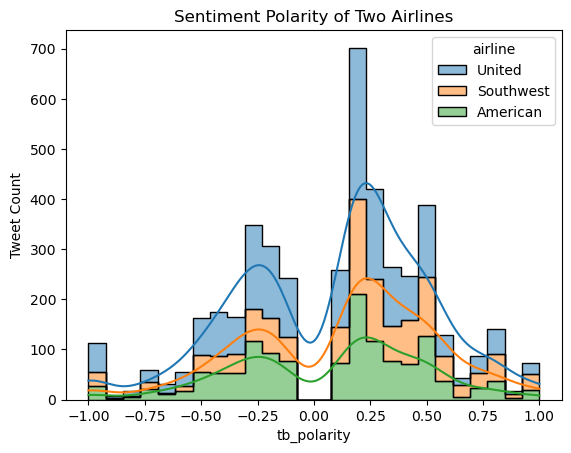

In [20]:
fig, ax = plt.subplots()
ax.legend().set_title("SOMETHING")

#sns.kdeplot(data=data, x="polarity", hue="airline", multiple="stack")

#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='step', kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='step', stat="density", common_norm=False, cumulative=True, kde=True)
sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='step', kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='poly', kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="fill", kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="layer", kde=True)

#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="dodge", kde=True)


plt.title("Sentiment Polarity of Two Airlines")
plt.ylabel("Tweet Count")
plt.show()

In [17]:
# You can also check out the Plot.ly graphics library - it has the ability to add sliders, and other interactive elements, to your charts